### Set Local Path

In [1]:
your_local_path="D:/UpX_Academy/Python_Projects/Project_1_NYC_Flight_data/"

### Import necessary libraries and packages

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
from IPython.display import Markdown, display


### Define printmd function to print in **BOLD** and *Italics* letters.

In [3]:
def printmd(string):
    display(Markdown(string))

### Read dataset into dataframe and display top 5 rows to get the overview of data

In [3]:
data = pd.read_csv(your_local_path+"flight_data.csv")
data.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


### Get the number of missing data cells

In [6]:
missing_data = data.isnull().sum()

total_cells = np.product(data.shape)
print("Total number of cells in dataset: ",total_cells)

missing_cells = missing_data.sum()
print("Total number of missing cells in dataset: ",missing_cells)

percent_miss = (missing_cells/total_cells)*100
print("Total percentage for missing column is approx: {:1.1}%".format(percent_miss))

Total number of cells in dataset:  6398744
Total number of missing cells in dataset:  46595
Total percentage for missing column is approx: 0.7%


### Display rows containing NaN values

In [7]:
data[data.isnull().any(axis=1)]


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
471,2013,1,1,1525.0,1530,-5.0,1934.0,1805,NaN,MQ,4525,N719MQ,LGA,XNA,NaN,1147,15,30,01-01-2013 15:00
477,2013,1,1,1528.0,1459,29.0,2002.0,1647,NaN,EV,3806,N17108,EWR,STL,NaN,872,14,59,01-01-2013 14:00
615,2013,1,1,1740.0,1745,-5.0,2158.0,2020,NaN,MQ,4413,N739MQ,LGA,XNA,NaN,1147,17,45,01-01-2013 17:00
643,2013,1,1,1807.0,1738,29.0,2251.0,2103,NaN,UA,1228,N31412,EWR,SAN,NaN,2425,17,38,01-01-2013 17:00
725,2013,1,1,1939.0,1840,59.0,29.0,2151,NaN,9E,3325,N905XJ,JFK,DFW,NaN,1391,18,40,01-01-2013 18:00
733,2013,1,1,1952.0,1930,22.0,2358.0,2207,NaN,EV,4333,N11194,EWR,TUL,NaN,1215,19,30,01-01-2013 19:00
754,2013,1,1,2016.0,1930,46.0,NaN,2220,NaN,EV,4204,N14168,EWR,OKC,NaN,1325,19,30,01-01-2013 19:00
838,2013,1,1,NaN,1630,NaN,NaN,1815,NaN,EV,4308,N18120,EWR,RDU,NaN,416,16,30,01-01-2013 16:00
839,2013,1,1,NaN,1935,NaN,NaN,2240,NaN,AA,791,N3EHAA,LGA,DFW,NaN,1389,19,35,01-01-2013 19:00
840,2013,1,1,NaN,1500,NaN,NaN,1825,NaN,AA,1925,N3EVAA,LGA,MIA,NaN,1096,15,0,01-01-2013 15:00


#### *"From the above representation it is evident that dep_time, dep_delay, arr_time, arr_delay and air_time columns contains NaN values"*

### Check median mode and outliers for dep_delay

count    328521.000000
mean         12.639070
std          40.210061
min         -43.000000
25%          -5.000000
50%          -2.000000
75%          11.000000
max        1301.000000
Name: dep_delay, dtype: float64

***Top 5 frequently occuring values in the column***
-5.0    24821
-4.0    24619
-3.0    24218
-2.0    21516
-6.0    20701
Name: dep_delay, dtype: int64

***Boxplot to visualize the data distribution***


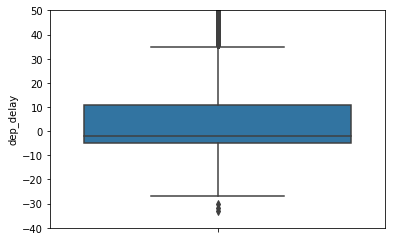

*Above data shows that dep_delay data is highly dispersed with lot many outliers        and mean value lying just above the 75% quartile. Also, we can see a range of frequently        occuring values which are negative integers.But we will use average value to fill the missing        values in the respective column to sustain the column average or it will deviate.*

In [8]:
import seaborn as sns
print(data.dep_delay.describe())
print("\n***Top 5 frequently occuring values in the column***")
print(data.dep_delay.value_counts().head(5)) #top 5 frequently occuring values in the column
print("\n***Boxplot to visualize the data distribution***")
sns.boxplot(y='dep_delay', data=data)
plt.ylim(-40,50)
plt.show()

printmd("*Above data shows that dep_delay data is highly dispersed with lot many outliers\
        and mean value lying just above the 75% quartile. Also, we can see a range of frequently\
        occuring values which are negative integers.But we will use average value to fill the missing\
        values in the respective column to sustain the column average or it will deviate.*")

### Fill dep_delay NaN values with the mean average value of the respective column.

In [9]:
#fills_list = data.dep_delay.value_counts().index[:5]
#data['dep_delay'] = data['dep_delay'].map(lambda x: np.random.choice(fills_list) if np.isnan(x) else x)
average = data.dep_delay.mean()
data.dep_delay.fillna(average, inplace=True)
data.dep_delay = data.dep_delay.round()

### Convert dep_time values to datetime format

In [10]:
data.dep_time = np.nan_to_num(data.dep_time).astype(int) ##Convert all values to Integer while converting NAN values to 0.
data.dep_time = data.dep_time.map(lambda x: 9999 if x == 0 else x ) ##Convert all 0 values to 9999
data.dep_time = data.dep_time.map(lambda x: 0 if x == 2400 else x ) ##Convert all 2400 time values to 0000
data.dep_time = data.dep_time.map("{:04}".format) ##Convert all time values to fixed 4 digit integer by appending leading 0's
data.dep_time = pd.to_datetime(data[data.dep_time != '9999'].dep_time, format='%H%M').dt.time ##Convert 4 digit integer value to time format in HH:MM:SS

### Convert sched_dep_time values to datetime format

In [11]:
data.sched_dep_time = data.sched_dep_time.map("{:04}".format) ##Similar as above
data.sched_dep_time = pd.to_datetime(data.sched_dep_time, format='%H%M').dt.time 

### Fill NaN values for dep_time column by adding sched_dep_time and dep_delay

In [12]:
for i in data[data.dep_time.isnull()].index.tolist():
    original = data.iloc[i,4]
    delay = data.iloc[i,5]
    t2 = dt.timedelta(minutes=delay) 
    data.iloc[i,3] = (dt.datetime.combine(dt.date(1,1,2),original) + t2).time()

### Convert arr_time values to datetime format

In [13]:
data.arr_time = np.nan_to_num(data.arr_time).astype(int) ##Similar as above
data.arr_time = data.arr_time.map(lambda x: 9999 if x == 0 else x )
data.arr_time = data.arr_time.map(lambda x: 0 if x == 2400 else x )
data.arr_time = data.arr_time.map("{:04}".format)
data.arr_time = pd.to_datetime(data[data.arr_time != '9999'].arr_time, format='%H%M').dt.time

### Convert sched_arr_time values to datetime format

In [14]:
data.sched_arr_time = data.sched_arr_time.map("{:04}".format)
data.sched_arr_time = pd.to_datetime(data.sched_arr_time, format='%H%M').dt.time

### Fill NaN values for arr_delay where "arr_time is not null"

In [15]:
for i in data[data.arr_time.notnull()][data.arr_delay.isnull()].index.tolist():
    original=data.iloc[i,7]
    actual=data.iloc[i,6]
    t1 = dt.timedelta(hours=original.hour,minutes=original.minute)
    t2 = dt.timedelta(hours=actual.hour,minutes=actual.minute)
    data.iloc[i,8]=(t2-t1).seconds/60

### Check median mode and outliers for arr_delay

count    328063.000000
mean          7.259127
std          45.482283
min         -86.000000
25%         -17.000000
50%          -5.000000
75%          14.000000
max        1272.000000
Name: arr_delay, dtype: float64

***Top 10 frequently occuring values in the column***
-13.0    7177
-10.0    7088
-12.0    7046
-14.0    6975
-11.0    6863
-9.0     6815
-15.0    6796
-7.0     6677
-17.0    6668
-8.0     6663
Name: arr_delay, dtype: int64

***Boxplot to visualize the data distribution***


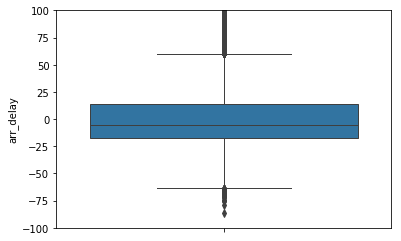

*Above data shows that dep_delay data is also highly dispersed with lot many outliers        and mean value lying below the 75% quartile. Also, we can see a range of frequently        occuring values which are negative integers.But we will use average value to fill the missing        values in the respective column to sustain the column average or it will deviate and sometimes I observed        that filling NaN values with frequent negative integers may result in divide by 0 while calculating air time.*

In [16]:
print(data.arr_delay.describe())
print("\n***Top 10 frequently occuring values in the column***")
print(data.arr_delay.value_counts().head(10))
print("\n***Boxplot to visualize the data distribution***")
sns.boxplot(y='arr_delay', data=data, linewidth=1)
plt.ylim(-100,100)
plt.show()
printmd("*Above data shows that dep_delay data is also highly dispersed with lot many outliers\
        and mean value lying below the 75% quartile. Also, we can see a range of frequently\
        occuring values which are negative integers.But we will use average value to fill the missing\
        values in the respective column to sustain the column average or it will deviate and sometimes I observed\
        that filling NaN values with frequent negative integers may result in divide by 0 while calculating air time.*")

### Fill arr_delay NaN values with the mean average value of the respective column.

In [17]:
#fill_list = data.arr_delay.value_counts().index[:10]
#data['arr_delay'] = data['arr_delay'].map(lambda x: np.random.choice(fill_list) if np.isnan(x) else x)
average_delay = data.arr_delay.mean()
data.arr_delay.fillna(average_delay, inplace=True)
data.arr_delay = data.arr_delay.round()

### Fill NaN values for arr_time column by adding sched_arr_time and arr_delay

In [18]:
for i in data[data.arr_time.isnull()].index.tolist():
    original = data.iloc[i,7]
    delay = data.iloc[i,8]
    t2 = dt.timedelta(minutes=delay) 
    data.iloc[i,6] = (dt.datetime.combine(dt.date(1,1,2),original) + t2).time() #dt.datetime.combine(...) lifts the datetime.time to a datetime.datetime object, the delta is then added, and the result is dropped back down to a datetime.time object.
    

### Fill NaN values for air_time column in minutes by subtracting dep_time from arr_time

In [19]:
for i in data[data.air_time.isnull()].index.tolist():
    origin=data.iloc[i,3]
    dest=data.iloc[i,6]
    t1 = dt.timedelta(hours=origin.hour,minutes=origin.minute)
    t2 = dt.timedelta(hours=dest.hour,minutes=dest.minute)
    data.iloc[i,14]=(t2-t1).seconds/60

### Check if any other NaN values left in Dataframe

In [20]:
data[data.isnull().any(axis=1)]


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1782,2013,1,2,15:58:00,15:45:00,13.0,19:17:00,19:10:00,7.0,AA,133,NaN,JFK,LAX,199.0,2475,15,45,02-01-2013 15:00
1784,2013,1,2,16:14:00,16:01:00,13.0,17:42:00,17:35:00,7.0,UA,623,NaN,EWR,ORD,88.0,719,16,1,02-01-2013 16:00
2697,2013,1,3,09:10:00,08:57:00,13.0,12:16:00,12:09:00,7.0,UA,714,NaN,EWR,MIA,186.0,1085,8,57,03-01-2013 08:00
2698,2013,1,3,06:58:00,06:45:00,13.0,09:59:00,09:52:00,7.0,UA,719,NaN,EWR,DFW,181.0,1372,6,45,03-01-2013 06:00
3608,2013,1,4,08:58:00,08:45:00,13.0,10:22:00,10:15:00,7.0,9E,3405,NaN,JFK,DCA,84.0,213,8,45,04-01-2013 08:00
3609,2013,1,4,18:43:00,18:30:00,13.0,20:51:00,20:44:00,7.0,9E,3716,NaN,EWR,DTW,128.0,488,18,30,04-01-2013 18:00
4332,2013,1,5,08:53:00,08:40:00,13.0,10:08:00,10:01:00,7.0,9E,3422,NaN,JFK,BOS,75.0,187,8,40,05-01-2013 08:00
6098,2013,1,7,08:33:00,08:20:00,13.0,10:05:00,09:58:00,7.0,9E,3317,NaN,JFK,BUF,92.0,301,8,20,07-01-2013 08:00
6997,2013,1,8,16:58:00,16:45:00,13.0,18:45:00,18:38:00,7.0,US,123,NaN,EWR,CLT,107.0,529,16,45,08-01-2013 16:00
7895,2013,1,9,08:08:00,07:55:00,13.0,10:19:00,10:12:00,7.0,9E,4023,NaN,EWR,CVG,131.0,569,7,55,09-01-2013 07:00


#### ***Results shows that 2500+ flights details are missing tailnum values. But those are unique values and cannot be filled on the basis of mean or mode. So we should leave them as it is***

### convert time_hour into proper pandas date time format

In [21]:
data['dep_timestamp']=data[['year','month','day','hour','minute']].apply(lambda x: dt.datetime(*x),axis=1)


### Drop time_hour column to avoid redundnt data

In [22]:

data=data.drop(columns=['time_hour'])

### Export refined data to csv, to avoid all above calculation again.

In [23]:
data.to_csv(your_local_path+"flights.csv")

### Assign NYC_flights dataset to flight Dataframe for further calculations.

In [4]:
flights = pd.read_csv(your_local_path+"flights.csv")

### 1. How many flights were there from NYC airports to Seattle ?

In [4]:
#data_dropna[data_dropna['dest']=='SEA'].groupby('dest').size() "Alternative method"
flights[flights['dest']=='SEA'].dest.value_counts()

NameError: name 'flights' is not defined

### 2. How many airlines fly from NYC to Seattle?

In [29]:
flights[flights['dest']=='SEA'].carrier.nunique()

5

### 3. How many unique air planes fly from NYC to Seattle?

In [30]:
flights[flights['dest']=='SEA'].tailnum.nunique()

935

### 4. What is the average arrival delay for flights from NYC to Seattle?

In [31]:
flights[flights['dest']=='SEA'].arr_delay.mean()

-0.3938312515931685

### 5. What proportion of flights to Seattle come from each NYC airport?

In [32]:
flight_per_airport = flights[flights['dest']=='SEA'].groupby('origin').size().reset_index(name = 'flight_count')
flight_per_airport.loc[2] = ['LGA',0]
flight_per_airport['Proportion'] = (flight_per_airport.flight_count/flight_per_airport.flight_count.sum())*100
flight_per_airport

,origin,flight_count,Proportion
0,EWR,1831,46.673464
1,JFK,2092,53.326536
2,LGA,0,0.000000


### 6. Which date has the largest average departure delay?

In [33]:
flights['dep_timestamp'] = pd.to_datetime(flights['dep_timestamp'], errors='coerce') #if the conversion fails for any particular string then those rows are set to NaT.
avg_dep_delay = flights.groupby(flights.dep_timestamp.dt.date)['dep_delay'].mean().sort_values(ascending=False).head(1)
avg_dep_delay

dep_timestamp
2013-03-08    70.567926
Name: dep_delay, dtype: float64

 ### 7. Which date has the largest average arrival delay?

In [34]:
avg_arr_delay = flights.groupby(flights.dep_timestamp.dt.date)['arr_delay'].mean().sort_values(ascending=False).head(1)
avg_arr_delay

dep_timestamp
2013-03-08    71.28192
Name: arr_delay, dtype: float64

### 8. Which was the worst day to fly out of NYC if one dislike delayed flights?

In [35]:
avg_dep_delay = flights.groupby(flights.dep_timestamp.dt.date)['dep_delay'].mean().sort_values(ascending=False).head(1)
printmd("*Worst day based on highest average departure delay is : *")
print(avg_dep_delay)
print("\n")

highest_delay = flights.iloc[flights.dep_delay.sort_values(ascending=False).head(2).index[0]][['dep_timestamp','dep_delay']]
printmd("*Worst day based on highest minute departure delay for single flight on a day is : *")
print(highest_delay)
print("\n")


most_delayed=flights[flights.dep_delay>0].groupby(flights.dep_timestamp.dt.date)['dep_delay'].count().sort_values(ascending=False).head(1)
printmd("*Worst day based on most delayed flights on single day is : *")
print(most_delayed)
print("\n")


most_delayed_count=flights[flights.dep_delay>0].groupby(flights.dep_timestamp.dt.date)['dep_delay'].count()
most_delayed_sum=flights.groupby(flights.dep_timestamp.dt.date)['dep_delay'].count()
most_delay_percent = ((most_delayed_count/most_delayed_sum)*100).sort_values(ascending=False).head(1)
printmd("*Worst day based on highest percentage of departure delay on a given day is : *")
print(most_delay_percent)


*Worst day based on highest average departure delay is : *

dep_timestamp
2013-03-08    70.567926
Name: dep_delay, dtype: float64




*Worst day based on highest minute departure delay for single flight on a day is : *

dep_timestamp    2013-01-09 09:00:00
dep_delay                       1301
Name: 7072, dtype: object




*Worst day based on most delayed flights on single day is : *

dep_timestamp
2013-03-08    833
Name: dep_delay, dtype: int64




*Worst day based on highest percentage of departure delay on a given day is : *

dep_timestamp
2013-03-08    85.086823
Name: dep_delay, dtype: float64


### 9. Are there any monthly patterns in departure delays for flights from NYC?

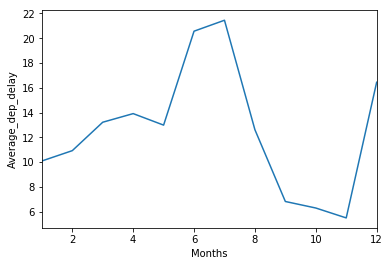

*Departure delays are more prominent during jun,july & Dec*

In [36]:
plt.plot(flights.groupby('month')['dep_delay'].mean())
plt.xlabel('Months')
plt.ylabel('Average_dep_delay')
plt.xlim(1,12)
plt.show()
printmd('*Departure delays are more prominent during jun,july & Dec*')

### 10. On average, how do departure delays vary over the course of a day?

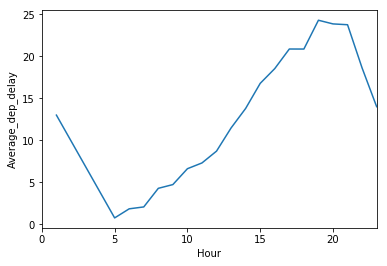

***Departure delays are more prominent during the evening & night*

In [37]:
plt.plot(flights.groupby('hour')['dep_delay'].mean())
plt.xlabel('Hour')
plt.ylabel('Average_dep_delay')
plt.xlim(0,23)
plt.show()
printmd('***Departure delays are more prominent during the evening & night*')

### 11. Which airlines contributed most to the sum total minutes of delay?

In [5]:
print(flights[flights['arr_delay']>0].groupby(['carrier']).arr_delay.sum().sort_values(ascending=False).head(1))

print(flights[flights['dep_delay']>0].groupby(['carrier']).dep_delay.sum().sort_values(ascending=False).head(1))

printmd("*Above results shows that EV airlines contributed most to the sum total minutes of arrival delay\
        as well as departure delay.*")

carrier
EV    1226326.0
Name: arr_delay, dtype: float64
carrier
EV    1201202.0
Name: dep_delay, dtype: float64


*Above results shows that EV airlines contributed most to the sum total minutes of arrival delay        as well as departure delay.*

### 12. Which route has the most amount of delay generally?

In [6]:
print(flights[flights['dep_delay']>0].groupby(['origin','dest']).dep_delay.sum().sort_values(ascending=False).head(1))
print(flights[flights['arr_delay']>0].groupby(['origin','dest']).arr_delay.sum().sort_values(ascending=False).head(1))

printmd("*Above results shows that LA Guardia to ATLANTA route has most amount of delay in minutes generally\
            both in case of arrival as well as departure delay*")

origin  dest
LGA     ATL     145838.0
Name: dep_delay, dtype: float64
origin  dest
LGA     ATL     183684.0
Name: arr_delay, dtype: float64


*Above results shows that LA Guardia to ATLANTA route has most amount of delay in minutes generally            both in case of arrival as well as departure delay*

### 13. Which flight/flights departing from NYC airport flew the fastest?

In [67]:
flights['speed']=flights.distance/(flights.air_time/60)
flights[flights.speed==flights.speed.max()]

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,dep_timestamp,speed
244345,244345,2013,6,24,16:27:00,14:49:00,98.0,16:30:00,16:23:00,7.0,...,253,N406UA,EWR,ORD,3.0,719,14,49,2013-06-24 14:49:00,14380.0


### 14. Average flight speed per carrier

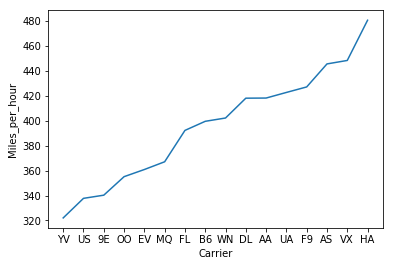

*HA carrier has the highest average flight speed*

In [68]:
plt.plot(flights.groupby('carrier')['speed'].mean().sort_values())
plt.ylabel('Miles_per_hour')
plt.xlabel('Carrier')
plt.show()
printmd("*HA carrier has the highest average flight speed*")

### 15. Which flights (i.e. carrier + flight + dest) happen every day?

In [69]:
flight_group = flights.groupby(['carrier','flight','dest']).size().reset_index(name='counter')
flight_group[flight_group.counter == max(flight_group.counter)]

,carrier,flight,dest,counter
767,AA,59,SFO,365
775,AA,119,LAX,365
783,AA,181,LAX,365
904,AA,1357,SJU,365
914,AA,1611,MIA,365
1118,B6,219,CLT,365
1147,B6,359,BUR,365
1150,B6,371,FLL,365
1169,B6,431,SRQ,365
1243,B6,703,SJU,365


### 16. Among the flights that fly to Seattle, on an average how does the departure & arrival delay look like for every carrier? 

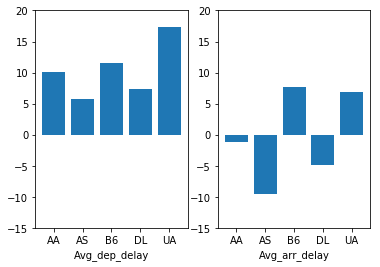

*UA airlines has a very high average departure delay while AS airlines has a negative average arrival delay means the flights generally arrive earlier than scheduled arrival time.*

In [70]:
fly_SEA=flights[flights.dest == 'SEA']
Y1=fly_SEA.groupby('carrier')['dep_delay'].mean()
Y2=fly_SEA.groupby('carrier')['arr_delay'].mean()
X=sorted(fly_SEA.carrier.unique())
plt.subplot(1,2,1)
plt.xlabel('Avg_dep_delay')
plt.bar(X,Y1)
plt.ylim(-15,20)
plt.subplot(1,2,2)
plt.xlabel('Avg_arr_delay')
plt.ylim(-15,20)
plt.bar(X,Y2)
plt.show()
printmd("*UA airlines has a very high average departure delay while AS airlines has a negative average arrival delay means the flights generally arrive earlier than scheduled arrival time.*")

### 17. Best airport in terms of departure time percentage

origin
LGA    25.620053
JFK    31.681612
EWR    42.698335
Name: dep_delay, dtype: float64


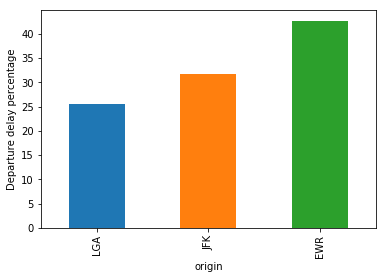

*LGA airport is best with the least departure delay percentage*

In [71]:
delay = flights.groupby('origin').dep_delay.sum().sort_values()
delay_sum = flights.groupby('origin').dep_delay.sum().sum()
delay_percent = (delay/delay_sum)*100
print(delay_percent)
delay_percent.plot(kind='bar')
plt.ylabel('Departure delay percentage')
plt.show()
printmd("*LGA airport is best with the least departure delay percentage*")

### 18. Check which destination airport is overutilized and underutilized?

dest
ORD    17283
Name: flight, dtype: int64


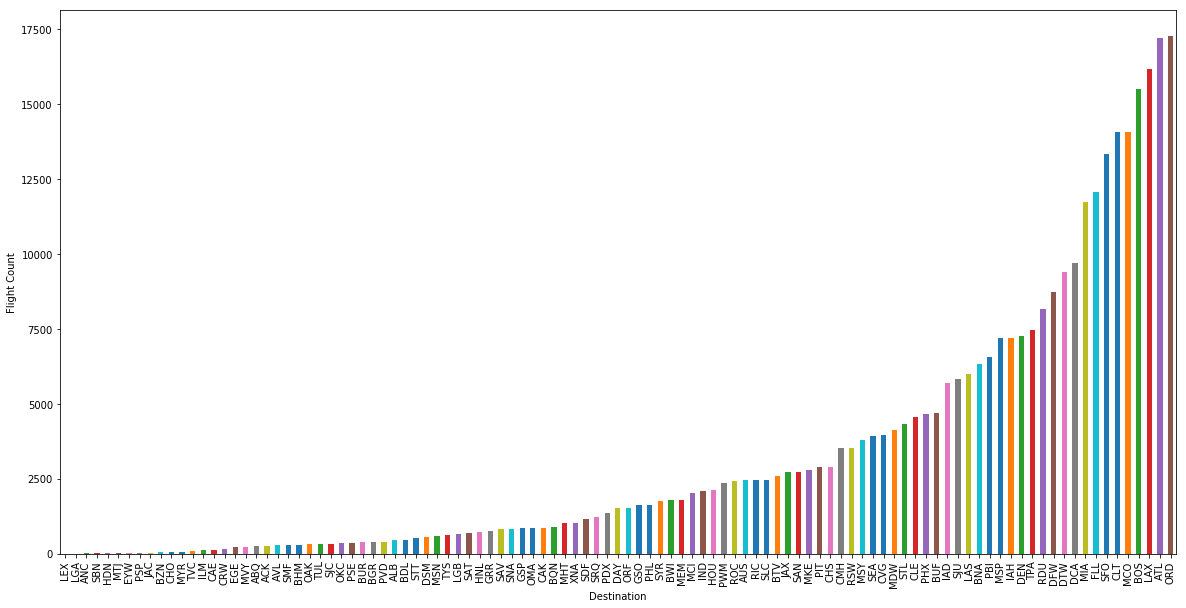

*Chicago O'Hare International Airport is overutilized and recieves highest number of flights,        while Blue Grass Airport is underutilized and recieves the least number of flights*

In [72]:
print(flights.groupby(['dest']).flight.count().sort_values(ascending=False).head(1))
plt.figure(figsize=(20,10))
var = flights.groupby(['dest']).flight.count().sort_values()
var.plot(kind='bar')
plt.xlabel('Destination')
plt.ylabel('Flight Count')
plt.show()
printmd("*Chicago O'Hare International Airport is overutilized and recieves highest number of flights,\
        while Blue Grass Airport is underutilized and recieves the least number of flights*")